In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from IPython.display import HTML

In [2]:
BATCH_SIZE = 32
IMAGE_SIZE = 48
CHANNELS=3
EPOCHS=50

In [4]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "Ved",
    seed=123,
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 5170 files belonging to 7 classes.


In [5]:
class_names = dataset.class_names
class_names

['0', '1', '2', '3', '4', '5', '6']

In [6]:
len(dataset)

162

In [7]:
162*32

5184

In [8]:
for image_batch, labels_batch in dataset.take(1):
    print(image_batch.shape)
    print(labels_batch.numpy())

(32, 48, 48, 3)
[0 6 5 2 1 6 6 5 4 1 0 6 4 6 5 0 1 6 4 0 0 4 2 0 6 0 0 5 6 1 0 1]


In [9]:
for image_batch, labels_batch in dataset.take(1):
    print(image_batch[0].numpy())

[[[104.46007     82.46007     71.46007   ]
  [132.36458    110.364586    97.364586  ]
  [172.0729     150.0729     137.0729    ]
  ...
  [ 13.359386     0.7673638    0.        ]
  [ 11.302083     4.8020835    3.1770835 ]
  [ 15.876714    11.876714    10.876714  ]]

 [[130.17188    108.171875    97.171875  ]
  [162.64062    140.64062    127.640625  ]
  [182.41145    160.41145    147.41145   ]
  ...
  [ 29.994823    16.16148     11.562519  ]
  [ 16.03125      9.53125      6.53125   ]
  [ 11.880201     7.8802013    4.8802013 ]]

 [[130.29861    108.29861     97.29861   ]
  [165.0677     143.0677     130.0677    ]
  [186.08333    164.08333    151.08333   ]
  ...
  [ 54.28823     39.8351      35.33336   ]
  [ 24.84375     18.34375     15.343749  ]
  [ 13.592008     9.592008     6.5920076 ]]

 ...

 [[103.92018     90.92018     81.92018   ]
  [127.27083    114.08853    105.08853   ]
  [106.7847      93.493034    84.493034  ]
  ...
  [  3.9236002    2.9236002    0.9236001 ]
  [  4.           

In [10]:
for image_batch, labels_batch in dataset.take(1):
    print(image_batch[0].shape)

(48, 48, 3)


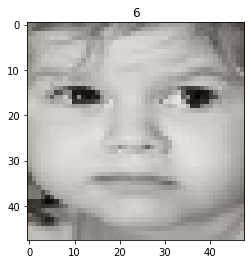

In [13]:
for image_batch, labels_batch in dataset.take(1):
    plt.imshow(image_batch[0].numpy().astype("uint8"))
    plt.title(class_names[labels_batch[0]])
#     plt.axis("off")

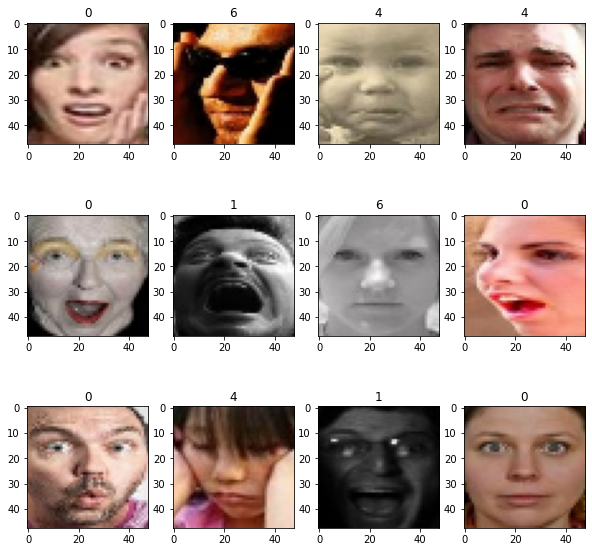

In [14]:
plt.figure(figsize=(10, 10))
for image_batch, labels_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3, 4, i + 1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[labels_batch[i]])
#         plt.axis("off")


In [15]:
len(dataset)

162

In [16]:

train_size = 0.8
len(dataset)*train_size

129.6

In [17]:
train_ds = dataset.take(129)
len(train_ds)

129

In [18]:
test_ds = dataset.skip(129)
len(test_ds)

33

In [19]:
val_size=0.1
len(dataset)*val_size

16.2

In [20]:
val_ds = test_ds.take(16)
len(val_ds)

16

In [21]:
test_ds = test_ds.skip(16)
len(test_ds)

17

In [22]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    assert (train_split + test_split + val_split) == 1
    
    ds_size = len(ds)
    
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    
    train_ds = ds.take(train_size)    
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    return train_ds, val_ds, test_ds

In [23]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [24]:
len(train_ds)

129

In [25]:
len(val_ds)

16

In [26]:
len(test_ds)

17

In [27]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [28]:
resize_and_rescale = tf.keras.Sequential([
  layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
  layers.experimental.preprocessing.Rescaling(1./255),
])

In [29]:
data_augmentation = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  layers.experimental.preprocessing.RandomRotation(0.2),
])

In [33]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 7

model = models.Sequential([
    resize_and_rescale,
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])


model.build(input_shape=input_shape)

In [34]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 48, 48, 3)           0         
                                                                 
 conv2d_13 (Conv2D)          (32, 46, 46, 32)          896       
                                                                 
 max_pooling2d_13 (MaxPoolin  (32, 23, 23, 32)         0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (32, 21, 21, 64)          18496     
                                                                 
 max_pooling2d_14 (MaxPoolin  (32, 10, 10, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_15 (Conv2D)          (32, 8, 8, 64)           

In [35]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [36]:
history = model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=1,
    epochs=50,
)

Epoch 1/50
129/129 [==============================] - 23s 133ms/step - loss: 1.9067 - accuracy: 0.1845 - val_loss: 1.8942 - val_accuracy: 0.2188
Epoch 2/50
129/129 [==============================] - 11s 88ms/step - loss: 1.8552 - accuracy: 0.2307 - val_loss: 1.8161 - val_accuracy: 0.2500
Epoch 3/50
129/129 [==============================] - 15s 114ms/step - loss: 1.7906 - accuracy: 0.2662 - val_loss: 1.7448 - val_accuracy: 0.3027
Epoch 4/50
129/129 [==============================] - 12s 90ms/step - loss: 1.7129 - accuracy: 0.3036 - val_loss: 1.6770 - val_accuracy: 0.3496
Epoch 5/50
129/129 [==============================] - 12s 92ms/step - loss: 1.6259 - accuracy: 0.3590 - val_loss: 1.5966 - val_accuracy: 0.3496
Epoch 6/50
129/129 [==============================] - 14s 106ms/step - loss: 1.5084 - accuracy: 0.4198 - val_loss: 1.4099 - val_accuracy: 0.4668
Epoch 7/50
129/129 [==============================] - 14s 109ms/step - loss: 1.3665 - accuracy: 0.4964 - val_loss: 1.2660 - val_accur

In [37]:
scores = model.evaluate(test_ds)

17/17 [==============================] - 1s 12ms/step - loss: 0.5525 - accuracy: 0.9173


In [38]:
scores

[0.5524590015411377, 0.9172794222831726]

In [39]:

history

In [40]:
history.params

{'verbose': 1, 'epochs': 50, 'steps': 129}

In [41]:

history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [42]:

type(history.history['loss'])

list

In [43]:
len(history.history['loss'])

50

In [44]:
history.history['loss'][:5] # show loss for first 5 epochs

[1.9066938161849976,
 1.8551751375198364,
 1.7905811071395874,
 1.7128738164901733,
 1.6259050369262695]

In [45]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

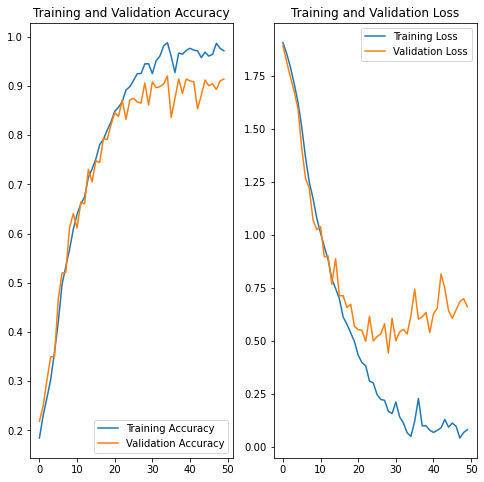

In [46]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

first image to predict
actual label: 4
1/1 [==============================] - 2s 2s/step
predicted label: 4


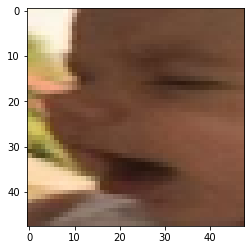

In [47]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):
    
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])

In [48]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 21ms/step


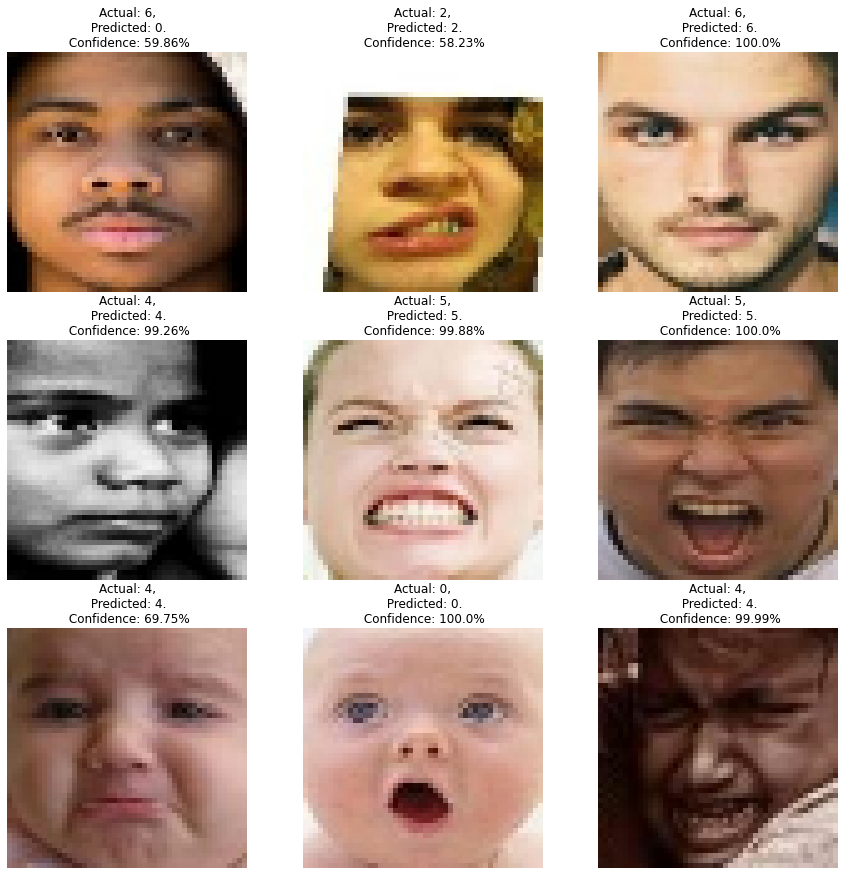

In [50]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")

In [52]:
import os
model_version=max([int(i) for i in os.listdir("models") + [0]])+1
model.save(f"C:/Users/HARSHAL/models/{model_version}")

INFO:tensorflow:Assets written to: C:/Users/HARSHAL/models/6\assets


INFO:tensorflow:Assets written to: C:/Users/HARSHAL/models/6\assets


In [54]:

model.save("A-97-VA-91-Ved.h5")